In [1]:
import numpy as np
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt
import collections

In [2]:
class KNNClassifier(object):
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def euc_distance(self, a, b):
        return np.linalg.norm(a-b)

    def closest(self, row,k):
        """
        Retorna a classe respondente ao ponto mais próximo do dataset de treino.\
        É um exemplo de implementação do kNN com k=1.
        """
        dists = [self.euc_distance(row, item) for item in self.X_train][self.y_trains[row]]
        dists.sort(key=operator.itemgetter(1))
        neighbors = []
        for x in range(k):
            neighbors.append(dist[x][0])
        return neighbors
    def define_class(neighbors):
        classVotes = {}
        for x in range(len(neighbors)):
            response = neighbors[x][-1]
            if response in classVotes:
                classVotes[response] += 1
            else:
                classVotes[response] = 1
        sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
        return sortedVotes[0][0]
    def fit(self, training_data, training_labels):
        self.X_train = training_data
        self.y_train = training_labels

    def predict(self, to_classify):
        predictions = []
        for row in to_classify:
            label = self.closest(row)
            predictions.append(label)
        return predictions

In [3]:
titanic = open('train.csv')

In [4]:
from sklearn import metrics

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:

knn = KNeighborsClassifier(p=2, metric='minkowski')

In [7]:
import pandas as pd


In [8]:
titanic = pd.read_csv('train.csv',na_values="?" )

In [9]:
print(titanic)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [25]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [31]:
obj_df = titanic.select_dtypes(include=['object']).copy()

In [32]:
obj_df.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [10]:

from sklearn.preprocessing import LabelEncoder

In [11]:
sex_encoder = LabelEncoder().fit(titanic.Sex)
titanic['Sex_encoded'] = sex_encoder.transform(titanic.Sex)

In [29]:
cabin_encoder = LabelEncoder().fit(titanic.Cabin.fillna("None"))
titanic["Cabin_encoded"] = cabin_encoder.transform(titanic.Cabin.fillna("None"))
embarked_encoder = LabelEncoder().fit(titanic.Embarked.fillna("None"))
titanic["Embarked_encoded"] = embarked_encoder.transform(titanic.Embarked.fillna("None"))
titanic['Age_imputed'] = titanic.Age.fillna(titanic.Age.mean())

In [30]:
columns = ['Pclass', 'Sex_encoded', 'Cabin_encoded', 'Embarked_encoded', 'Age_imputed', 'SibSp', 'Parch']
titanic[columns].corr()

,Pclass,Sex_encoded,Cabin_encoded,Embarked_encoded,Age_imputed,SibSp,Parch
Pclass,1.000000,0.131900,0.682176,0.197493,-0.331339,0.083081,0.018443
Sex_encoded,0.131900,1.000000,0.095991,0.106395,0.084153,-0.114631,-0.245489
Cabin_encoded,0.682176,0.095991,1.000000,0.232192,-0.234912,0.043525,-0.028179
Embarked_encoded,0.197493,0.106395,0.232192,1.000000,-0.034883,0.068043,0.032517
Age_imputed,-0.331339,0.084153,-0.234912,-0.034883,1.000000,-0.232625,-0.179191
SibSp,0.083081,-0.114631,0.043525,0.068043,-0.232625,1.000000,0.414838
Parch,0.018443,-0.245489,-0.028179,0.032517,-0.179191,0.414838,1.000000


In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

In [32]:
columns.remove("Cabin_encoded")

In [33]:
X = MinMaxScaler().fit_transform(titanic[columns])
y = titanic.Survived.values

In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.1, random_state=1)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier()

In [37]:
splitRand = ShuffleSplit(test_size=.25, n_splits=1, random_state=0)

n_neighbors = np.arange(1, 30, 4)
param_grid = {'n_neighbors': n_neighbors}

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
gridS = GridSearchCV(knn, param_grid, cv=splitRand)
gridS.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=0, test_size=0.25, train_size=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  5,  9, 13, 17, 21, 25, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Text(0.5,0,'Vizinhos')

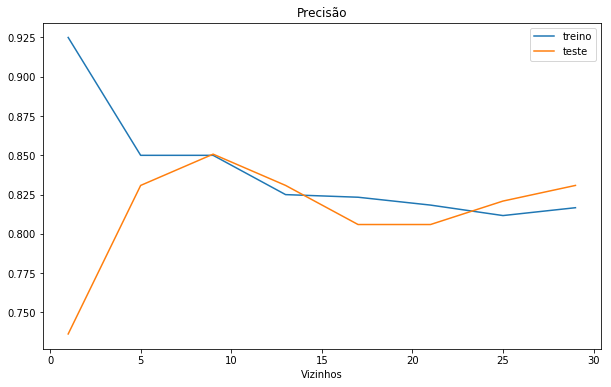

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, gridS.cv_results_['mean_train_score'])
plt.plot(n_neighbors, gridS.cv_results_['mean_test_score'])
plt.legend(['treino', 'teste'])
plt.title("Precisão")
plt.xlabel("Vizinhos")

In [41]:
gridS.best_params_

{'n_neighbors': 9}

In [42]:
melhor = gridS.best_estimator_
melhor.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [43]:
from sklearn.metrics import classification_report
print(classification_report(melhor.predict(X_valid), y_valid))

             precision    recall  f1-score   support

          0       0.87      0.72      0.79        64
          1       0.51      0.73      0.60        26

avg / total       0.77      0.72      0.73        90

